# Swissroll Example

### Imports

In [1]:
from sklearn import datasets, neighbors, preprocessing
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

# local imports
from os import chdir
chdir("../")

from lllvm2 import LL_LVM2

chdir("demo")

# Plotting configuration
%matplotlib inline
#sns.set()

# Simulation Data

In [6]:
x, t_true = datasets.make_swiss_roll(300, 0.01)
x = x / np.sum(x,0)
x = x.T
Dy, N = x.shape
Dt = 1

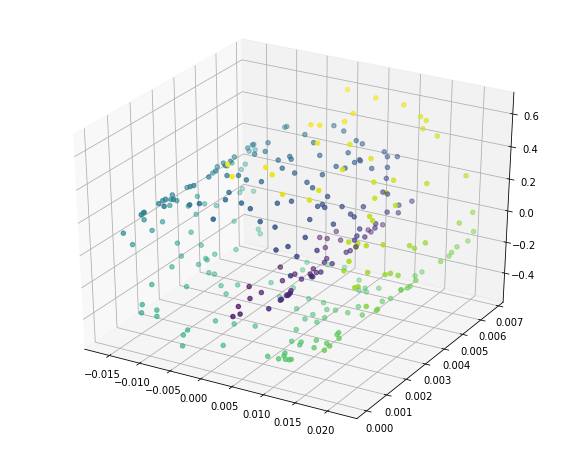

In [7]:
rcParams['figure.figsize'] = (10,8)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0,:], x[1,:], x[2,:], c=t_true, marker='o')
plt.show()

# Model

In [8]:
tinit = np.random.uniform(-1.5, 1.5, size=(Dt, N))
Cinit = 0.5*np.random.randn(Dy,Dt*N)

#build nearest neighbor graph
G = neighbors.kneighbors_graph(x.T, 9, mode='connectivity')
G = G + G.T
G.data = np.ones_like(G.data)

#set user-defined parameters
alpha = 1.0
gamma = 5.0
epsilon = .00001
V = np.identity(Dy) / gamma

model = LL_LVM2(G,epsilon,alpha,V,Cinit,tinit,x,.01)

# Sampling

In [ ]:
n_burn = 300

for i in range(n_burn):
    print("\rStep %d of %d, Current Likelihood: %d" % (i+1,n_burn, model.likelihoods[-1]), end="")
    model.MH_step(burn_in=True)

Step 278 of 300, Current Likelihood: -2352

In [ ]:
n_samp = 10

for i in range(n_samp):
    print("\rStep %d of %d" % (i+1,n_samp), end="")
    model.MH_step(burn_in=False)

In [ ]:
print("Acceptance rate: %.8f" % model.accept_rate)

# Likelihood Plot

In [ ]:
rcParams['figure.figsize'] = (16,6)
plt.plot(model.likelihoods)
plt.title("Sample Log-Likelihoods", fontsize=24)
plt.ylabel("Log Likelihood", fontsize=18)
plt.xlabel("Sample Index", fontsize=18);

## Version Information

In [ ]:
%load_ext version_information
%version_information numpy, scipy, sklearn, matplotlib, version_information